In [1]:
"""***************************** 21st mar'23 Assignment *****************************"""

"***************************** 21st mar'23 Assignment *****************************"

#### Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

##### Ans.


Ordinal encoding and label encoding are both techniques used to represent categorical variables numerically. However, there are key differences between them in terms of the nature of the variable and the information they capture.

##### Ordinal Encoding:

1.Ordinal encoding assigns a unique numerical value to each category based on their relative order or rank.

2.The assigned numbers carry ordinal information, implying a specific order or hierarchy among the categories.

3.It is suitable for variables where there is a meaningful order or ranking among the categories.

4.Example: Let's say you have a variable representing education level with categories "High School," "Bachelor's Degree," "Master's Degree," and "Ph.D." You can assign numerical codes 1, 2, 3, and 4, respectively, based on the increasing level of education.


##### Label Encoding:

1.Label encoding assigns a unique numerical value to each category without any inherent ordering or hierarchy.

2.The assigned numbers are arbitrary and do not imply any specific order or rank among the categories.

3.It is suitable for variables where there is no meaningful order among the categories.

4.Example: Consider a variable representing different colors with categories "Red," "Blue," and "Green." You can assign numerical codes 1, 2, and 3 to represent these categories, without implying any order or rank.

##### Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

##### Ans.

Target Guided Ordinal Encoding is a technique used to encode categorical variables by creating ordinal mappings based on the target variable. It leverages the relationship between the categorical variable and the target variable to assign numerical codes to each category, aiming to capture the target-related information in the encoding.

Here's how Target Guided Ordinal Encoding works:

Calculate the mean or median of the target variable for each category of the categorical variable.
Sort the categories based on their mean or median target values.
Assign ordinal numerical codes to the categories, starting from 1 for the category with the lowest mean or median target value and incrementing the code for each subsequent category.

Example of when to use Target Guided Ordinal Encoding:

Suppose you are working on a churn prediction project for a telecommunications company, and one of the categorical variables in your dataset is "Subscription Type" with categories like "Prepaid," "Postpaid," and "Corporate." You want to encode this variable in a way that reflects the likelihood of churn.

#### Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

##### Ans.

Covariance is a statistical measure that quantifies the relationship between two random variables. It indicates how changes in one variable are associated with changes in another variable. Specifically, covariance measures the extent to which two variables vary together.

Importance of Covariance in Statistical Analysis:

1.Relationship Assessment: Covariance helps in understanding the nature of the relationship between two variables. If the covariance is positive, it indicates a positive relationship, meaning that as one variable increases, the other tends to increase as well. A negative covariance suggests a negative relationship, indicating that as one variable increases, the other tends to decrease.

2.Direction and Magnitude: Covariance not only reveals the direction of the relationship but also provides a measure of the strength or magnitude of the relationship. A larger positive or negative covariance indicates a stronger association between the variables.

3.Multivariate Analysis: Covariance is crucial in multivariate analysis, where multiple variables are involved. It helps in determining the interdependencies and associations among multiple variables simultaneously.

Covariance is calculated using the following formula:

            cov(X, Y) = Σ[(Xᵢ - μₓ)(Yᵢ - μᵧ)] / (n - 1)

    where:
    cov(X, Y) represents the covariance between variables X and Y.
    Xᵢ and Yᵢ are the individual data points of X and Y, respectively.
    μₓ and μᵧ are the means of X and Y, respectively.
    n is the number of data points.
    
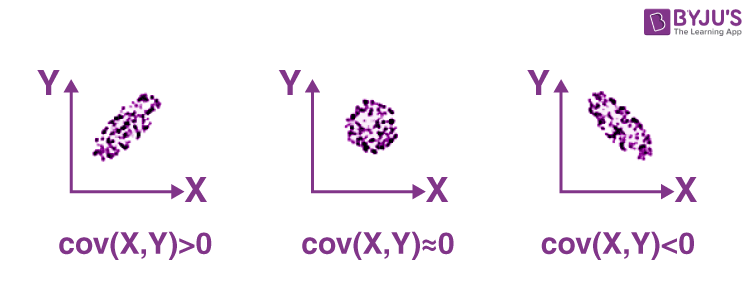

#### Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the data as a list of lists
data = [['red', 'small', 'wood'],
        ['green', 'medium', 'metal'],
        ['blue', 'large', 'plastic'],
        ['red', 'small', 'plastic']]

columns = ['Color', 'Size', 'Material']

df = pd.DataFrame(data, columns=columns)

print(f'Dataframe Before Encoding :\n {df}')
print('\n=================================\n')

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

pd.DataFrame(df)

Dataframe Before Encoding :
    Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red   small  plastic




,Color,Size,Material
0,2,2,2
1,1,1,0
2,0,0,1
3,2,2,1


#### Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.|

In [6]:
import numpy as np
import pandas as pd

# Setting random seed 
np.random.seed(765)

# Generating synthetic data
n = 1000
age = np.random.randint(low=25,high=60,size=n)
education_level = np.random.choice(['High School','Bachelor','Masters','PhD'],size=n)
income = 1200*age + np.random.normal(loc=0, scale=5000,size=n)

# Storing in dataframe
df = pd.DataFrame(
    {'age':age,
     'education_level':education_level,
     'income':income}
)

df.head()

,age,education_level,income
0,54,Masters,64428.015536
1,51,Masters,54313.962387
2,29,High School,34920.177216
3,52,Bachelor,68267.339595
4,42,High School,48145.405198


In [8]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['High School','Bachelor','Masters','PhD']])
edu_endoded = encoder.fit_transform(df[['education_level']])
df['education_level']=np.ravel(edu_endoded)
df.head()

,age,education_level,income
0,54,2.0,64428.015536
1,51,2.0,54313.962387
2,29,0.0,34920.177216
3,52,1.0,68267.339595
4,42,0.0,48145.405198


covariance matrix

In [11]:
df.cov()

,age,education_level,income
age,101.174679,0.298671,1.190446e+05
education_level,0.298671,1.226698,3.719956e+02
income,119044.596197,371.995631,1.654904e+08


#### Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

##### Ans.
For the categorical variables "Gender", "Education Level", and "Employment Status" in a machine learning project, there are different encoding methods that could be used depending on the specific algorithm and data preprocessing requirements. Here are some encoding methods that could be used for each variable:


1.Gender: One-Hot Encoding is a good choice for the "Gender" variable because there are only two possible values (Male and Female). One-Hot Encoding creates a binary column for each possible value, where a 1 indicates the presence of that value and 0 indicates its absence. This method is particularly useful when the categorical variable has no order or hierarchy between its possible values.

2.Education Level: Ordinal Encoding or Label Encoding could be used for the "Education Level" variable since there is a natural order between the possible values (High School < Bachelor's < Master's < PhD). Ordinal Encoding assigns a numerical value to each category in a way that preserves the order between them, whereas Label Encoding assigns a numerical value arbitrarily. If the order between categories is important for the machine learning algorithm, then Ordinal Encoding would be a better choice.

3.Employment Status: One-Hot Encoding could be used for the "Employment Status" variable since there are three possible values (Unemployed, Part-Time, Full-Time) and no natural order or hierarchy between them. One-Hot Encoding creates a binary column for each possible value, where a 1 indicates the presence of that value and 0 indicates its absence. This method is particularly useful when the categorical variable has no order or hierarchy between its possible values.

#### Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [15]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(321)

# Generate data
n = 1000
temp = np.random.normal(25, 5, n)
humidity = np.random.normal(60, 10, n)
weather_condition = np.random.choice(['Sunny', 'Cloudy', 'Rainy'], size=n)
wind_direction = np.random.choice(['North', 'South', 'East', 'West'], size=n)

# Create dataframe
df = pd.DataFrame({
    'Temperature': temp, 
    'Humidity': humidity, 
    'Weather Condition': weather_condition, 
    'Wind Direction': wind_direction
})

# Show first few rows
df.head()

,Temperature,Humidity,Weather Condition,Wind Direction
0,25.862597,50.526311,Sunny,South
1,33.177413,55.809608,Sunny,South
2,25.186682,70.091030,Sunny,West
3,20.579252,68.981094,Sunny,South
4,19.284039,78.624127,Rainy,East


he covariance between each pair 

In [16]:
df.cov(numeric_only=True)

,Temperature,Humidity
Temperature,25.165416,1.610779
Humidity,1.610779,105.612893
